# Import Libraries Start Query Engine

In [1]:
import json
import ast
import pandas as pd
import csv
import requests
import time
import traceback
from sqlalchemy import *
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.declarative import declarative_base
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import datetime
import instaconfig

instagram, database = instaconfig.config()

engine = create_engine('mysql://%(user)s:%(pass)s@%(host)s' % database)

search_tags = ['busk','busker','buskers','busking','streetmusic',
               'streetmusician','streetmusicians','streetperformer',
               'streetperformers','streetlife','livemusic']


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
# Select Database
def check_popular_tags(search_tag):
    import pylab
    from pandas import DataFrame
    %matplotlib inline
    
    connection = engine.connect()
    result = connection.execute('use %s_%s' % (database['name'],search_tag))
    
    q = '''select tag, count(tag) as cnt from tags 
            group by tag order by cnt desc LIMIT 40;'''
    
    q_result = connection.execute(q)
    
    df = DataFrame(q_result.fetchall())
    df.columns = q_result.keys()
        
    pylab.rcParams['figure.figsize'] = (10.0, 8.0)
    plt.figure();

    df.head(15).plot(kind='bar', x='tag', y='cnt', fontsize=24, title=search_tag);
    
    connection.close()

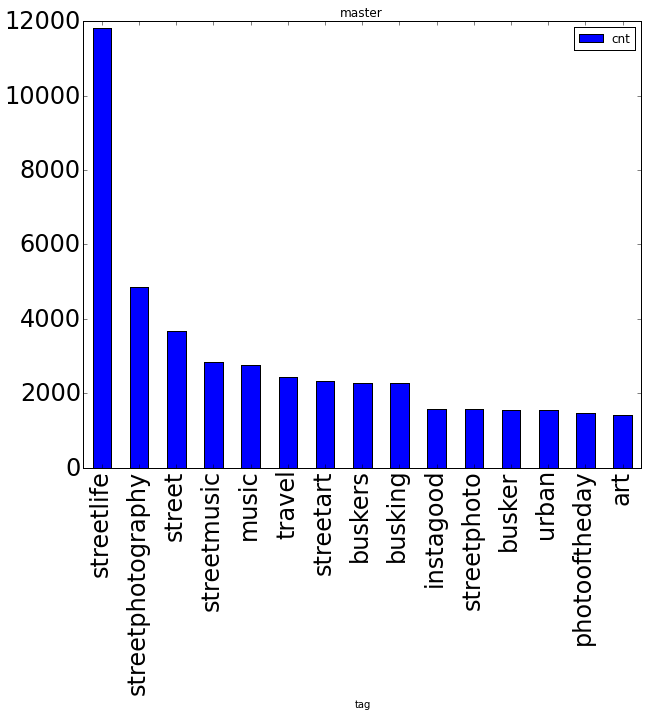

In [10]:
check_popular_tags('master')

In [20]:
    connection = engine.connect()
    result = connection.execute('use instagram')
    
    q = '''SELECT count(*) FROM posts 
            WHERE post_id = '%s';''' % '1072687080161339926_816587745'#insta_post['id'].encode('ascii','replace')
    
    q_result = connection.execute(q)
    
    q_result.fetchall()[0][0] == 1
    
    connection.close()

True


In [10]:
search_tags

['busk',
 'busker',
 'buskers',
 'busking',
 'streetmusic',
 'streetmusician',
 'streetmusicians',
 'streetperformer',
 'streetperformers',
 'streetlife',
 'livemusic']